In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn  as sns
import dython as dy


# check how normalization effects data
# normalize
# standardize
# raw data

import libsvm as lsvm


In [2]:
sns.set(rc={'figure.figsize':(20,20)})

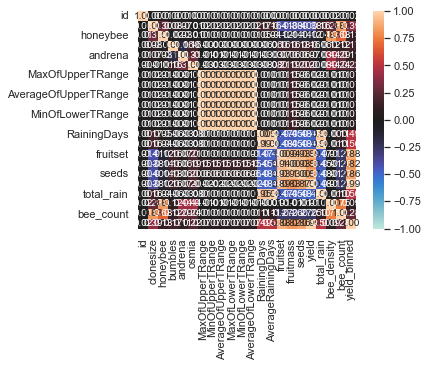

C:\Users\Noah\AppData\Local\Temp\ipykernel_1928\542283648.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Noah\AppData\Local\Temp\ipykernel_1928\542283648.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Noah\AppData\Local\Temp\ipykernel_1928\542283648.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Noah\AppData\Local\Temp\ipykernel_1928\542283648.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Noah\AppData\Local\Temp\ipykernel_1928\542283648.py:54: UserWarning: Matplotlib is currently using module://matplot

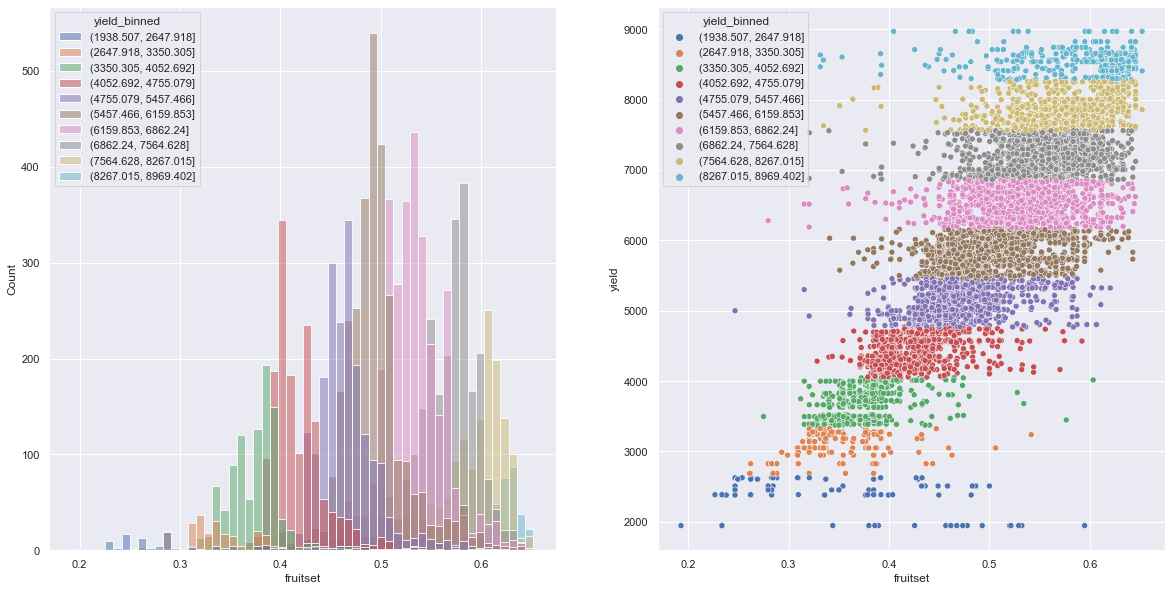

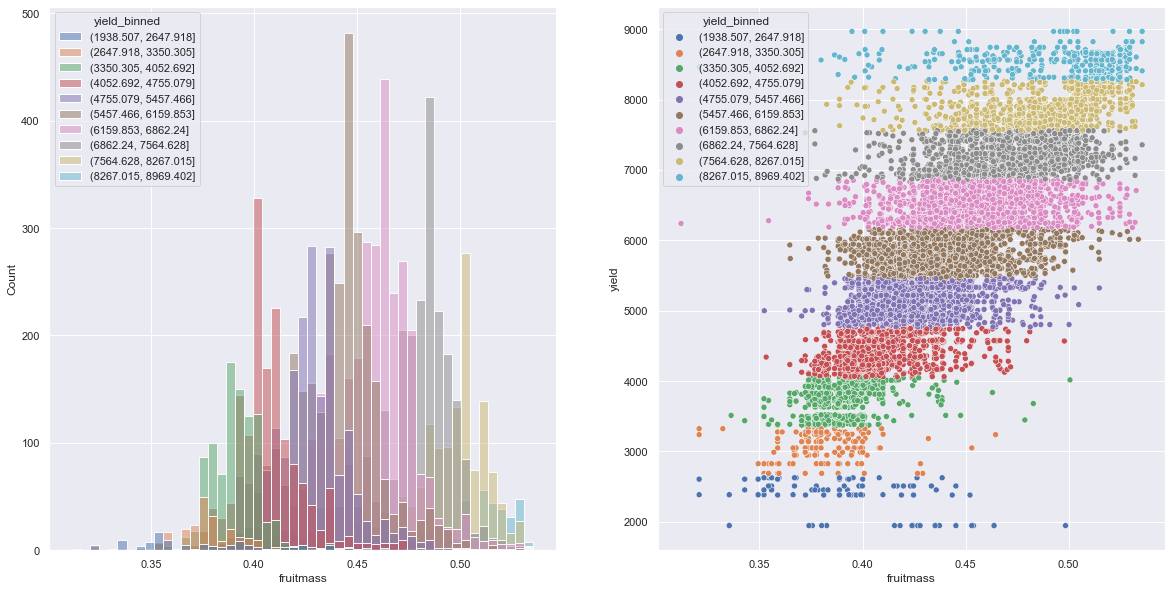

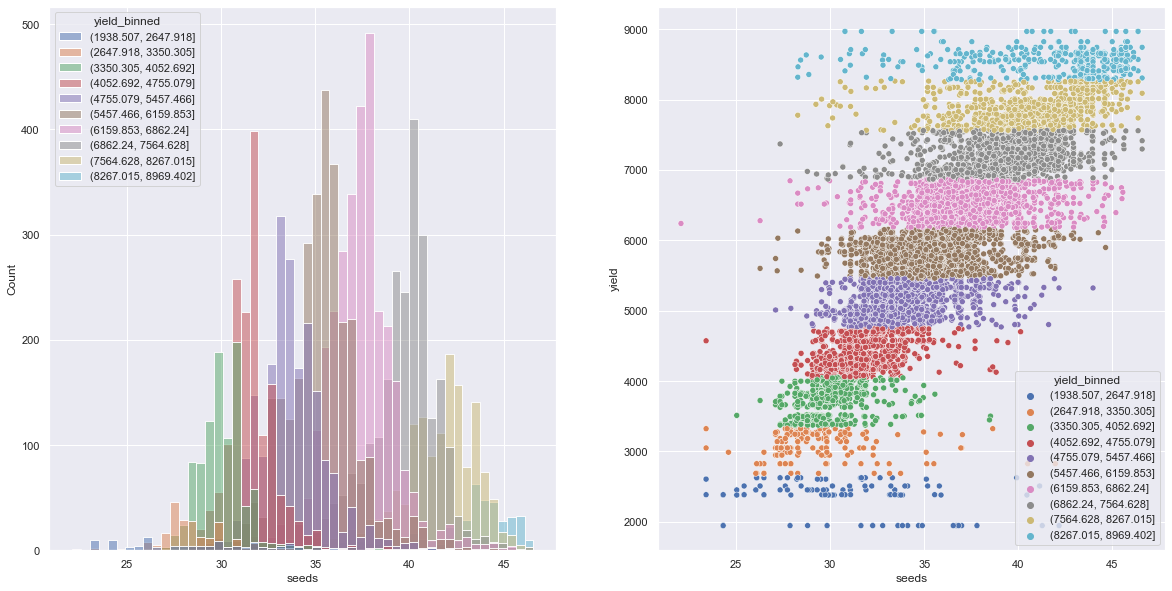

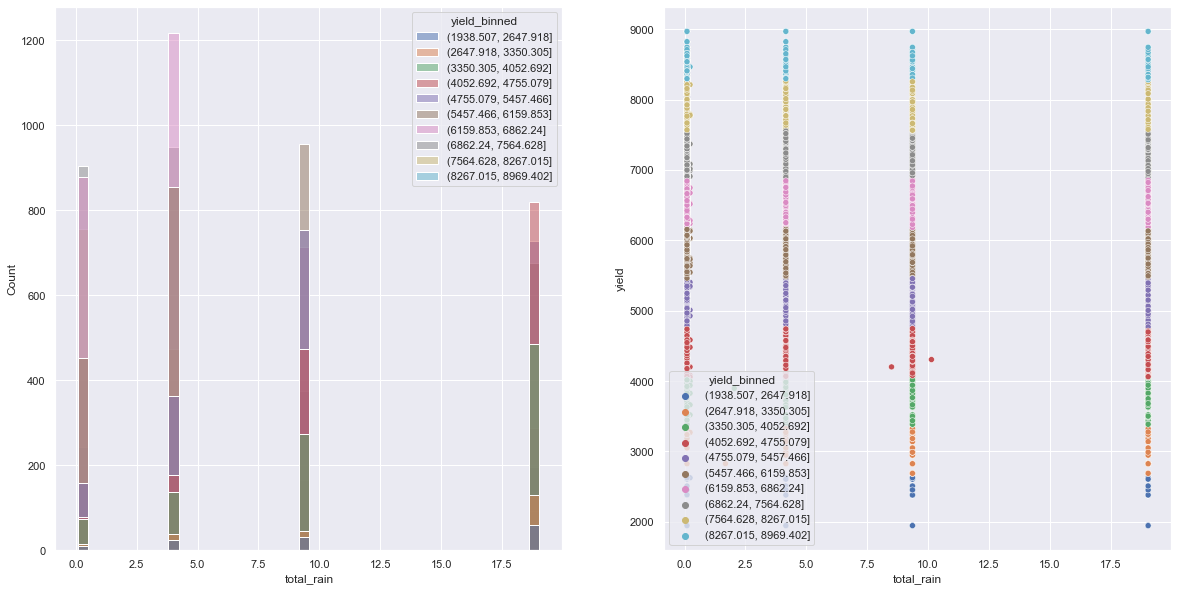

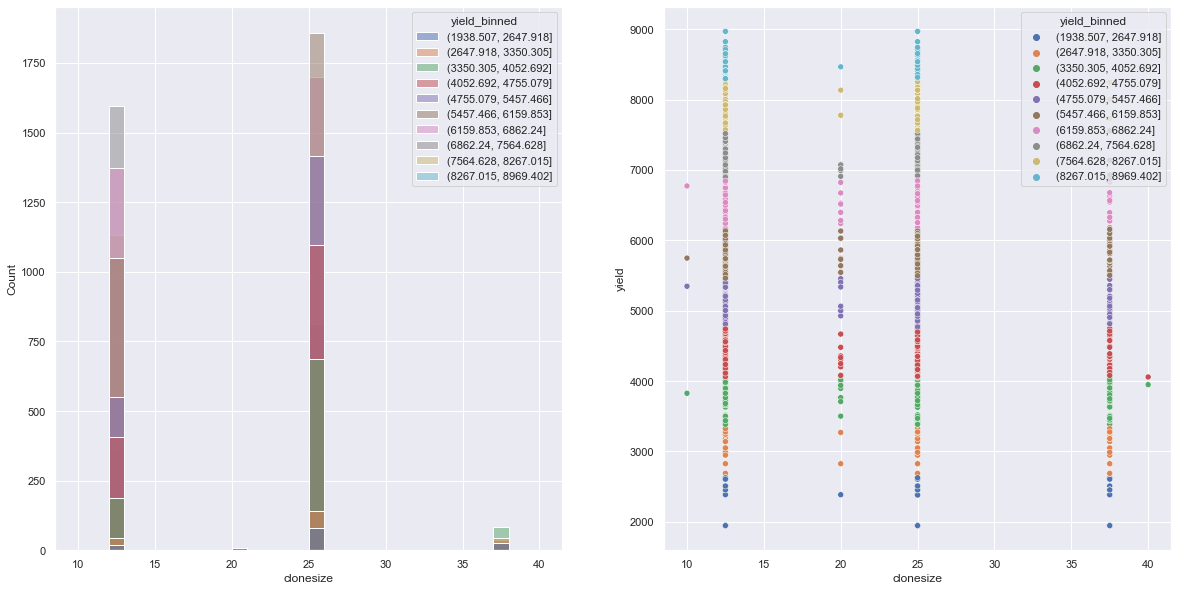

In [3]:
# read dataset
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

org = pd.read_csv("WildBlueberryPollinationSimulationData.csv")
org = org.drop(columns=["Row#"])


# train = pd.concat([train,org])
# # summary of data

# display(len(train))

# Clonesize m2 The average blueberry clone size in the field
# Honeybee bees/m2/min Honeybee density in the field
# Bumbles bees/m2/min Bumblebee density in the field
# Andrena bees/m2/min Andrena bee density in the field
# Osmia bees/m2/min Osmia bee density in the field
# MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season
# MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature
# AverageOfUpperTRange ℃ The average of the upper band daily air temperature
# MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature
# MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature
# AverageOfLowerTRange ℃ The average of the lower band daily air temperature
# RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero
# AverageRainingDays Day The average of raining days of the entire bloom season

# check for nans
train.isnull().sum()

# add features
train["total_rain"] = train["AverageRainingDays"]*train["RainingDays"]
train["bee_density"] = train["honeybee"] + train["bumbles"] + train["andrena"] + train["osmia"]
train["bee_count"] = train["bee_density"]*train["clonesize"]
train["yield_binned"] = pd.cut(train["yield"],bins=10)



test["total_rain"] = test["AverageRainingDays"]*test["RainingDays"]
#check for corealtions 
from dython.nominal import associations
associations(train) 
plt.show()
target = ["yield"]
selected_x_features = ["fruitset","fruitmass","seeds","total_rain","clonesize"]
sns.set(rc={'figure.figsize':(20,10)})

# validation_x,validation_y = org[selected_x_features],org["yield"]
# EDA
for col in selected_x_features:
    fig, ax =plt.subplots(1,2)
    sns.histplot(x=col,data=train,ax=ax[0],hue="yield_binned",legend="brief")
    sns.scatterplot(x=col,data=train,y="yield",ax=ax[1],hue="yield_binned",legend="brief")
    fig.show()



In [4]:
# lets cut off all features but those with a very strong coreallation and see what happens with the test data MSE!
train_distilled = train[selected_x_features+target]

train_distilled_x = train_distilled.drop(columns=["yield"])
train_distilled_y = train_distilled["yield"]


In [5]:
# Import the necessary modules
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import BaggingRegressor 
# display(sklearn.metrics.get_scorer_names())

x,y= train.drop(inplace=False,columns=["yield"]+selected_x_features),train["yield"]
x,y=train_distilled_x,train_distilled_y

res = pd.DataFrame()
res["id"]=test["id"]













# def svm_objective(trial):
    
#     C = trial.suggest_float("C",0.1,1)
#     epsilon = trial.suggest_float("epsilon",0.01,0.8)
#     kernel = trial.suggest_categorical("kernel",["linear", "poly", "rbf", "sigmoid"])
#     degree = trial.suggest_int("degree",2,16)
    


#     skf = KFold(n_splits=5)
#     mae_array = []
#     # Loop over the splits
#     for train_index, test_index in skf.split(x, y):
#         # Print the indices of the train and test sets
#         # print(f"Train: {train_index}, Test: {test_index}")
#         # Split the data into train and test sets
#         x_train, X_test = x.iloc[train_index], x.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         # Fit a linear SVM on the train set
#         clf = svm.SVR(
#             C=C,
#             epsilon=epsilon,
#             kernel=kernel,
#             degree=degree
#         ).fit(x_train,y_train)
#         # Evaluate the accuracy on the test set
#         score = clf.score(X_test, y_test)
#         y_pred = clf.predict(X_test)
#         # Print the score
       
#         mae_array.append(mae(y_pred=y_pred,y_true=y_test))
#     return np.mean(mae_array)



# sampler = TPESampler()
# svm_study  = optuna.create_study(direction="minimize",sampler=sampler)
# svm_study.optimize(svm_objective,n_trials=20,n_jobs=8)

# display("Best Pramaeters: ",svm_study.best_params)


# model = BaggingRegressor(
#     base_estimator=svm.SVR(
#     kernel=svm_study.best_params["kernel"],
#     C=svm_study.best_params["C"],
#     epsilon=svm_study.best_params["epsilon"],
#     degree=svm_study.best_params["degree"]
# ),
# n_estimators=50,
# n_jobs=8

# ).fit(x,y)


# res["yield"] = model.predict(test[selected_x_features])
# res.to_csv("res.csv",index=False)




import lightgbm as lgbm

# hist = lgbm.cv(params={'n_estimators':100,
#                 'stratified':False,
#             'objective': 'regression_l1',
#             "num_leaves": 16,
#             'learning_rate': 0.05,
#             'subsample': 0.60,
#             'colsample_bytree': 1,
#             #'reg_alpha': 0.25,
#             'reg_lambda': 5e-07,
#             'boosting_type': 'gbdt'},train_set=lgbm.Dataset(x,y,free_raw_data=False),nfold=5,metrics='mae',stratified=False)

# res = pd.DataFrame()
# res["id"]=test["id"]
# res['yield'] = 0
# for i in range(50):
#     model = lgbm.LGBMRegressor(n_estimators=300,
#                     n_jobs=4,
                    
#                 objective= 'regression_l1',
#                 num_leaves= 64,
#                 learning_rate= 0.05,
#                 subsample= 0.60,
#                 colsample_bytree= 1,
            
#                 #'reg_alpha': 0.25,
#                 metrics='mae',
#                 reg_lambda= 5e-07,
#                 boosting_type= 'gbdt').fit(x,y)

   
    
#     res["yield"] = res["yield"] + model.predict(test[selected_x_features])
# res["yield"] = res['yield']/50


# TODO: UNDO

def lgbm_objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 50, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.25)
    max_depth = trial.suggest_int("max_depth", 2, 256)
    num_leaves = trial.suggest_int("num_leaves", 31, 511)
    subsample = trial.suggest_float("subsample", 0.8, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.3, 1)
    boosting_type = trial.suggest_categorical("boosting_type",["gbdt"])

    model = lgbm.LGBMRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        boosting_type= boosting_type,
        metrics="mae"
    )

    mae_value=0
    for i in range(3):
        fit_x = x.sample(frac=0.75)
        fit_y = y[fit_x.index]

        val_x = x.drop(fit_x.index)
        val_y = y.drop(fit_x.index)
        model.fit(fit_x, fit_y)

        y_pred = model.predict(val_x)
        mae_value += mae(val_y, y_pred)

    return mae_value/3

for k in range(1):
    sampler = optuna.samplers.TPESampler()
    lgbm_study  = optuna.create_study(direction="minimize",sampler=sampler)
    lgbm_study.optimize(lgbm_objective,n_trials=200,n_jobs=4)

    display("Best Pramaeters: ",lgbm_study.best_params)
    optimal = lgbm_study.best_params
    # model = lgbm.LGBMRegressor(
    #         n_estimators=optimal["n_estimators"],
    #         learning_rate=optimal["learning_rate"],
    #         max_depth=optimal["max_depth"],
    #         num_leaves=optimal["num_leaves"],
    #         subsample=optimal["subsample"],
    #         colsample_bytree=optimal["colsample_bytree"],
    #         boosting_type= optimal["boosting_type"],
    #         metrics="mae"
    #     )

    # model.fit(x, y)

    model = BaggingRegressor(
    base_estimator=lgbm.LGBMRegressor(
            n_estimators=optimal["n_estimators"],
            learning_rate=optimal["learning_rate"],
            max_depth=optimal["max_depth"],
            num_leaves=optimal["num_leaves"],
            subsample=optimal["subsample"],
            colsample_bytree=optimal["colsample_bytree"],
            boosting_type= optimal["boosting_type"],
            metrics="mae"
        ),
    n_estimators=100,
    n_jobs=4

    ).fit(x,y)

    y_pred = model.predict(test[selected_x_features])
    res["yield"] = y_pred
res["yield"] = res["yield"]/1
res.to_csv("res.csv",index=False)


[I 2023-05-16 20:22:35,097] A new study created in memory with name: no-name-4919438b-5ce5-423d-8f11-8738853cfa34
[I 2023-05-16 20:22:45,254] Trial 0 finished with value: 405.59699878413835 and parameters: {'n_estimators': 669, 'learning_rate': 0.1712635969816635, 'max_depth': 84, 'num_leaves': 62, 'subsample': 0.9091141039073924, 'colsample_bytree': 0.434984023580141, 'boosting_type': 'gbdt'}. Best is trial 0 with value: 405.59699878413835.
[I 2023-05-16 20:22:53,258] Trial 2 finished with value: 378.4081343766054 and parameters: {'n_estimators': 854, 'learning_rate': 0.028283240635078775, 'max_depth': 116, 'num_leaves': 89, 'subsample': 0.8043799843285727, 'colsample_bytree': 0.8986375191611573, 'boosting_type': 'gbdt'}. Best is trial 2 with value: 378.4081343766054.
[I 2023-05-16 20:23:15,938] Trial 4 finished with value: 457.8837781124303 and parameters: {'n_estimators': 597, 'learning_rate': 0.16791913926739813, 'max_depth': 105, 'num_leaves': 263, 'subsample': 0.9933901388034878,

'Best Pramaeters: '

{'n_estimators': 209,
 'learning_rate': 0.0438365239201444,
 'max_depth': 39,
 'num_leaves': 39,
 'subsample': 0.9618074409040774,
 'colsample_bytree': 0.9656731085743454,
 'boosting_type': 'gbdt'}